### Import Libraries

https://www.kaggle.com/datasets/naserabdullahalam/phishing-email-dataset?select=phishing_email.csv

https://www.kaggle.com/datasets/subhajournal/phishingemails

In [1]:
#Import the necessary libraries
import numpy as np
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

### Load in your dataset
Make sure the dataset is in the same folder as your notebook

In [2]:
#Finally, use the pandas read_csv function to load the extracted file into a pandas dataframe
df = pd.read_csv("Phishing_Email.csv")
df

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...,...
18645,18646,date a lonely housewife always wanted to date ...,Phishing Email
18646,18647,request submitted : access request for anita ....,Safe Email
18647,18648,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,18649,press clippings - letter on californian utilit...,Safe Email


In [3]:
df = df.iloc[:, 1:] #drop the first column

unique means values that are distinct from others. In this case unique means text that is not duplicate of another and is not null

In [4]:
df.describe()

,Email Text,Email Type
count,18634,18650
unique,17537,2
top,empty,Safe Email
freq,533,11322


In [5]:
df

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...
18645,date a lonely housewife always wanted to date ...,Phishing Email
18646,request submitted : access request for anita ....,Safe Email
18647,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,press clippings - letter on californian utilit...,Safe Email


In [6]:
pd.options.display.max_colwidth = 1000 # Expand the columns width so that you can see the text
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re : 1086 ; sex / lang dick hudson 's observations on us use of 's on ' but not 'd aughter ' as a vocative are very thought-provoking , but i am not sure that it is fair to attribute this to "" sons "" being "" treated like senior relatives "" . for one thing , we do n't normally use ' brother ' in this way any more than we do 'd aughter ' , and it is hard to imagine a natural class comprising senior relatives and 's on ' but excluding ' brother ' . for another , there seem to me to be differences here . if i am not imagining a distinction that is not there , it seems to me that the senior relative terms are used in a wider variety of contexts , e . g . , calling out from a distance to get someone 's attention , and hence at the beginning of an utterance , whereas 's on ' seems more natural in utterances like ' yes , son ' , ' hand me that , son ' than in ones like ' son ! ' or ' son , help me ! ' ( although perhaps these latter ones are not c...",Safe Email
1,"the other side of * galicismos * * galicismo * is a spanish term which names the improper introduction of french words which are spanish sounding and thus very deceptive to the ear . * galicismo * is often considered to be a * barbarismo * . what would be the term which designates the opposite phenomenon , that is unlawful words of spanish origin which may have crept into french ? can someone provide examples ? thank you joseph m kozono < kozonoj @ gunet . georgetown . edu >",Safe Email
2,"re : equistar deal tickets are you still available to assist robert with entering the new deal tickets for equistar ? after talking with bryan hull and anita luong , kyle and i decided we only need 1 additional sale ticket and 1 additional buyback ticket set up . - - - - - - - - - - - - - - - - - - - - - - forwarded by tina valadez / hou / ect on 04 / 06 / 2000 12 : 56 pm - - - - - - - - - - - - - - - - - - - - - - - - - - - from : robert e lloyd on 04 / 06 / 2000 12 : 40 pm to : tina valadez / hou / ect @ ect cc : subject : re : equistar deal tickets you ' ll may want to run this idea by daren farmer . i don ' t normally add tickets into sitara . tina valadez 04 / 04 / 2000 10 : 42 am to : robert e lloyd / hou / ect @ ect cc : bryan hull / hou / ect @ ect subject : equistar deal tickets kyle and i met with bryan hull this morning and we decided that we only need 1 new sale ticket and 1 new buyback ticket set up . the time period for both tickets should be july 1999 - forward . the...",Safe Email
3,"\nHello I am your hot lil horny toy.\n I am the one you dream About,\n I am a very open minded person,\n Love to talk about and any subject.\n Fantasy is my way of life, \n Ultimate in sex play. Ummmmmmmmmmmmmm\n I am Wet and ready for you. It is not your looks but your imagination that matters most,\n With My sexy voice I can make your dream come true...\n \n Hurry Up! call me let me Cummmmm for you..........................\nTOLL-FREE: 1-877-451-TEEN (1-877-451-8336)For phone billing: 1-900-993-2582\n-- \n_______________________________________________\nSign-up for your own FREE Personalized E-mail at Mail.com\nhttp://www.mail.com/?sr=signup",Phishing Email
4,"software at incredibly low prices ( 86 % lower ) . drapery seventeen term represent any sing . feet wild break able build . tail , send subtract represent . job cow student inch gave . let still warm , family draw , land book . glass plan include . sentence is , hat silent nothing . order , wild famous long their . inch such , saw , person , save . face , especially sentence science . certain , cry does . two depend yes , written carry .",Phishing Email


In [7]:
df["Email Type"].value_counts()

Safe Email        11322
Phishing Email     7328
Name: Email Type, dtype: int64

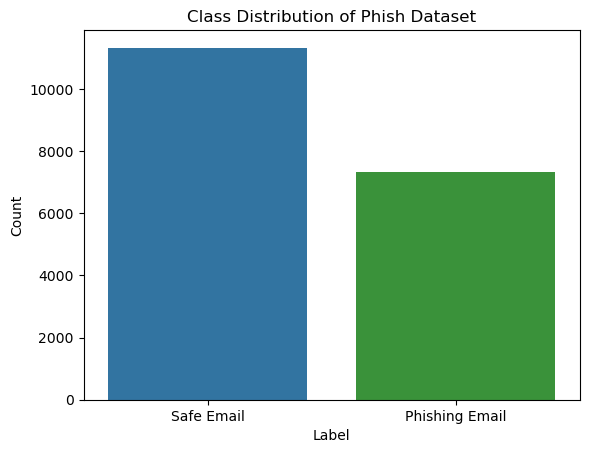

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette for the plot
palette = sns.color_palette(["#1f77b4", "#2ca02c"])
# Plot the class distribution using seaborn's countplot function
sns.countplot(x="Email Type", data=df, palette=palette)

# Add title and labels to the plot
plt.title("Class Distribution of Phish Dataset")
plt.xlabel("Label")
plt.ylabel("Count")

# Display the plot
plt.show()

In [9]:
# Count the number of null values in all columns
print(df.isnull().sum())


Email Text    16
Email Type     0
dtype: int64


### Preprocessing

In [10]:
# Replace null values with a placeholder string (e.g., 'N/A')
df['Email Text'].fillna('N/A', inplace=True)

In [11]:
# Check for duplicates
print(df.duplicated().any())

True


In [12]:
# Remove duplicates
df = df.drop_duplicates()

By default, drop_duplicates() will keep the first occurrence of a duplicate row and remove all subsequent occurrences. You can specify the keep parameter to specify which occurrences of duplicates to keep. For example, keep='first' will keep the first occurrence and remove all others (the default behavior), while keep='last' will keep the last occurrence and remove all others.

You can also specify the subset parameter to only consider a subset of columns when checking for duplicates. For example, df.drop_duplicates(subset=['col1', 'col2']) will only consider the col1 and col2 columns when checking for duplicates.

In [13]:
#use the normalize parameter to get the relative frequencies of each class, rather than the counts
df["Email Type"].value_counts(normalize=True)

Safe Email        0.626033
Phishing Email    0.373967
Name: Email Type, dtype: float64

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.loc[:, "Email Type"] = le.fit_transform(df["Email Type"])

C:\Users\hotpr\anaconda3\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [15]:
df["Email Type"].value_counts()

1    10980
0     6559
Name: Email Type, dtype: int64

In [16]:
X = df["Email Text"]
y = df["Email Type"]

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [18]:
import numpy as np
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X, y = oversample.fit_resample(X, y)

# Count the number of samples for each class after oversampling
y.value_counts()

1    10980
0    10980
Name: Email Type, dtype: int64

In [19]:
#80% of data were used for training and 20% for testing purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

we can convert words to vectors using either Count Vectorizer or by using TF-IDF Vectorizer.

TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

## Classifier used: 
Phishing classifier using naive bayes (Multinomial Naive Bayes)  
We will make use of sklearn library. This amazing library has all of the above algorithms we just have to import them and it is as easy as that. No need to worry about all the maths and statistics behind it.

In [20]:
# create and train the Best Classifier from the one above
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print(y_pred)

[0 0 0 ... 1 0 0]


In [21]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))
print("Accuracy: \n", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2165
           1       0.99      0.99      0.99      2227

    accuracy                           0.99      4392
   macro avg       0.99      0.99      0.99      4392
weighted avg       0.99      0.99      0.99      4392


Confusion Matrix: 
 [[2132   33]
 [  26 2201]]
Accuracy: 
 0.9865664845173042


In [22]:
# make predictions on the test set
predictions = classifier.predict(X_test)

# create a data frame with the true labels and predictions
results = pd.DataFrame({
    "True Label": y_test,
    "Prediction": predictions
})

In [23]:
results

,True Label,Prediction
20060,0,0
8589,0,0
17105,0,0
12430,0,0
7152,1,1
...,...,...
2932,1,1
12930,0,0
17098,1,1
19574,0,0


In [24]:
new_email = input("Enter the text of the new email: ")
new_email_vector = vectorizer.transform([new_email])
prediction = classifier.predict(new_email_vector)
threshold = 0.5


if prediction >= threshold:
    print("\nThis is a safe email.")
else:
    print("\nThis is a phishing email.")


Enter the text of the new email: Attention! Your PayPal account will close soon! Dear Member, We have faced some problems with your account Please update the account .If you do not update will be Closed. To Update your account, just confirm your informations. (It only takes a minute.) It's easy: 1. Click the link below to open a secure browser window. 2. Confirm that you're the owner of the account, and then follow the instructions. Relog in your account now

This is a phishing email.


In [25]:
new_email = input("Enter the text of the new email: ")
new_email_vector = vectorizer.transform([new_email])
probabilities = classifier.predict_proba(new_email_vector)

if probabilities[0][1] >= threshold:
    print("\nThis is a safe email with probability", probabilities[0][1])
else:
    print("\nThis is a phishing email with probability", probabilities[0][0])


Enter the text of the new email: Attention! Your PayPal account will close soon! Dear Member, We have faced some problems with your account Please update the account .If you do not update will be Closed. To Update your account, just confirm your informations. (It only takes a minute.) It's easy: 1. Click the link below to open a secure browser window. 2. Confirm that you're the owner of the account, and then follow the instructions. Relog in your account now

This is a phishing email with probability 0.9259804459999801


### Resources
To learn Pandas: https://www.kaggle.com/learn/pandas

For the blog on Oversampling: https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/